# AllLife Bank Customer Segmentation

The Bank is running new marketing campaign for next year. The marketing team suggested to do a customer segmentation to focused those marketing to each customer groups in order to target on new customers as well as existing customers. The Operation teams wants to ensure that customer queries are resolved faster.

### Objective
Identify different segmentation in the existing customer, based on theri spending patterns as well as past interaction with the bank
* Using clustering algoritms
* Provide recommendations to the bank on how to better market to and service these customers.

## Key Questions

- How many different types (clusters/segments) of bank customers can be found from the data?
- How do these different groups of customer differ from each other?
- How to perform clustering using the components obtained from PCA?

## Data Description
Financial attributes of Bank Customers: credit limit, total number of credit cards, different contact channels

**Data Dictionary**
- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [67]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [68]:
## Read Data 
## S1_No can be use as index column
data = pd.read_excel("CreditCardCustomerData.xlsx", index_col="Sl_No")

<IPython.core.display.Javascript object>

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


<IPython.core.display.Javascript object>

There are 660 records and 6 columns in total on the dataset. A main characteristic of the customer is the average of the credit card and the other are customer behaviour patters to contact different channels of the bank

In [70]:
data.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

There is no missing data in the data set. The count of null values shows cero in every column

In [71]:
data.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

Also there is no missing value in the dataset. The function isna return the values where there is missing.

In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


<IPython.core.display.Javascript object>

Seems like the data there is no outliers or wrong values. All observation looks in range of the type of metric. The Avg Credit Limit might influence the clustering algorithms because it is a high value metric. It might be useful to scale the metrics

Define the problem and perform an Exploratory Data Analysis
Problem definition, questions to be answered - Data background and contents - Univariate analysis - Bivariate analysis - Insights based on EDA

Data preprocessing
Prepare the data for analysis - Feature engineering - Missing value treatment - Outlier treatment - Duplicate observations check

In [73]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [74]:
df1 = data.copy()

<IPython.core.display.Javascript object>

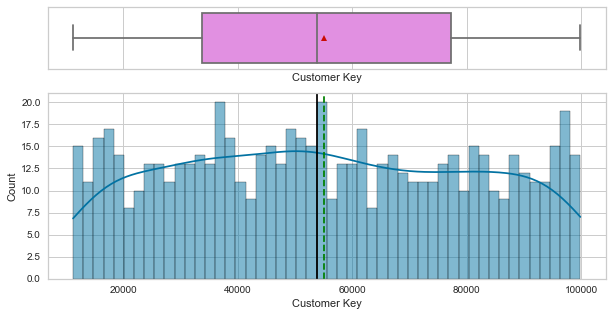

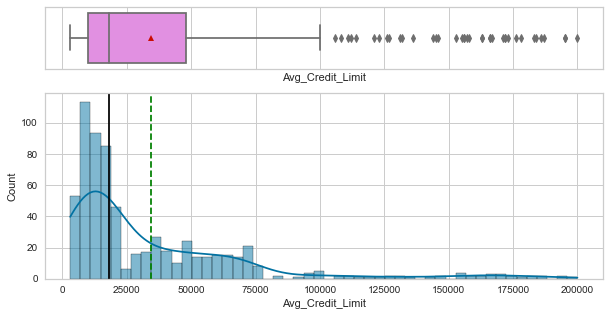

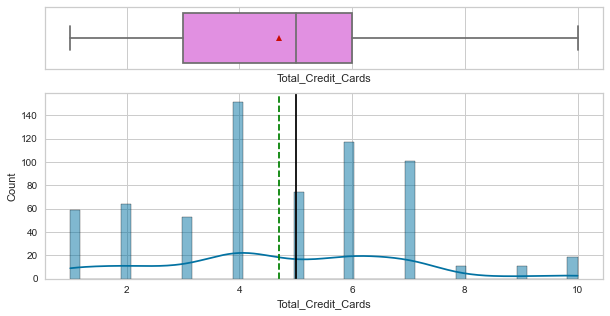

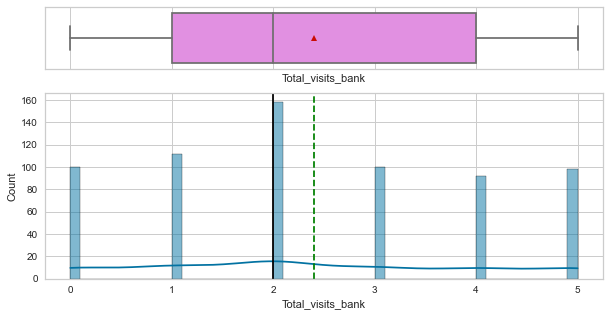

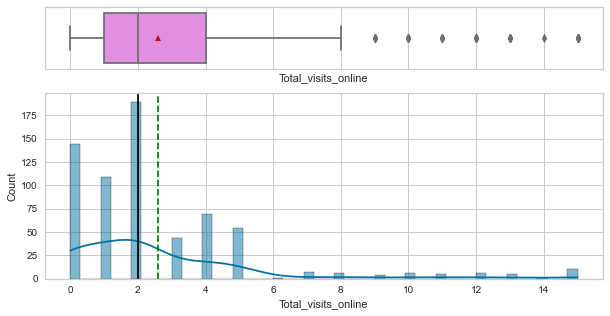

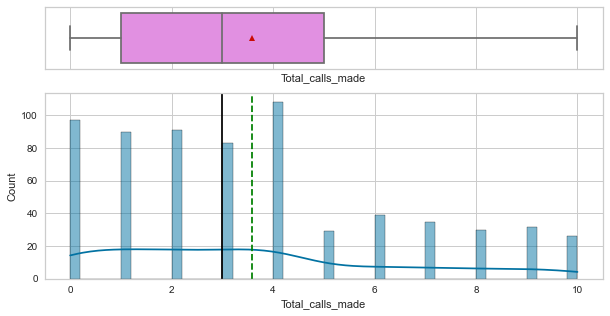

<IPython.core.display.Javascript object>

In [75]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(10, 5))

The customer key is a unique variable that identify the customer, however it looks like some values are repeated. Might be a change of behaviour.
The Avg Credit has a right skewed distribution, must of the customer are a credit limit around 18,000 USD
Also the visits online has a right skewed distribution. 
The channels have different range of visits. There are more digital users rather than visiting to a bank.

Bivariate - Correlation

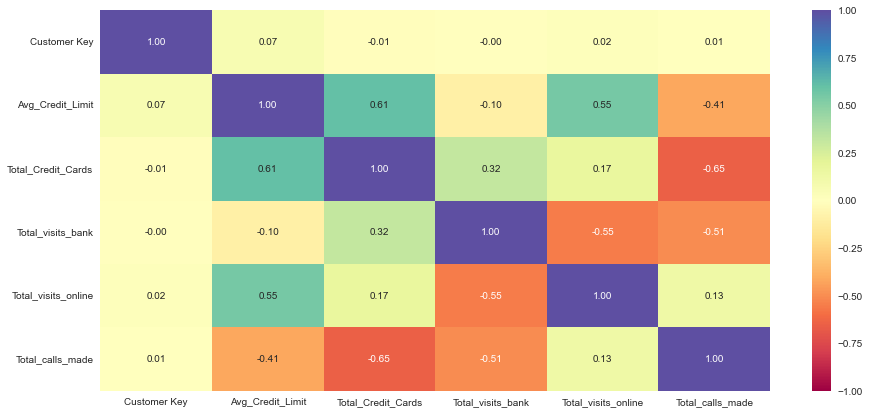

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There is a positive correlation between the number of credit card and the Avg Credit Limit. If the customer has more credit card will have a higher credit limit. Also there is a negative relationship between the visits online and the visits bank. The population who visit online might not visit the bank.

In [77]:
num_cols = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

<IPython.core.display.Javascript object>

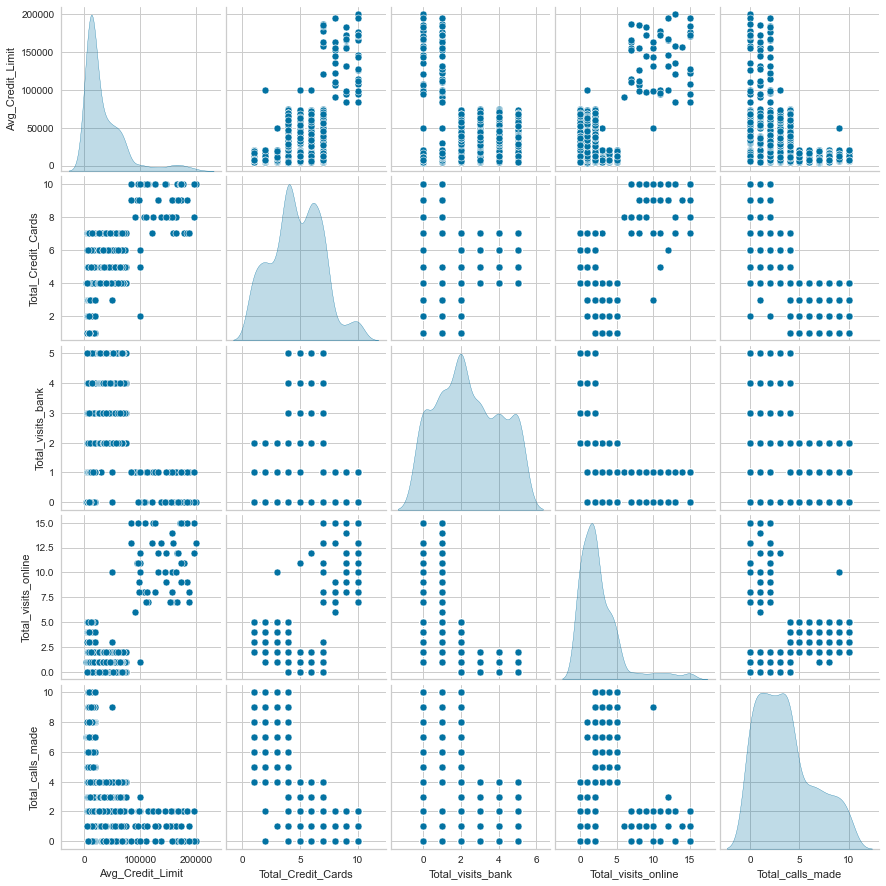

<IPython.core.display.Javascript object>

In [78]:
sns.pairplot(data=df1[num_cols], diag_kind="kde")
plt.show()

DataPreprocessing

In [79]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

The Avg Credit Limit is a high value column so it will have more influence on the clustering algorithms so it is needed to scale the dataframe

Applying K-means Clustering
Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out appropriate number of clusters - Cluster Profiling


Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9426543606899347
Number of Clusters: 7 	Average Distortion: 0.910589819968522
Number of Clusters: 8 	Average Distortion: 0.8890703256887419


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

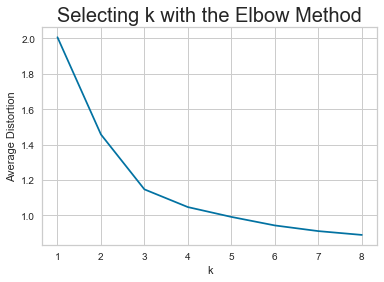

<IPython.core.display.Javascript object>

In [80]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled)
    prediction = model.predict(subset_scaled)
    distortion = (
        sum(
            np.min(cdist(subset_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

Using the elbow method the right number of cluster will be 3, after it drops the average distortion. Between 1 and 2 has high distortion

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.27153324487525304
For n_clusters = 6, silhouette score is 0.25516863727620004
For n_clusters = 7, silhouette score is 0.2486042710835614
For n_clusters = 8, silhouette score is 0.22598722373484703
For n_clusters = 9, silhouette score is 0.21871482673140819


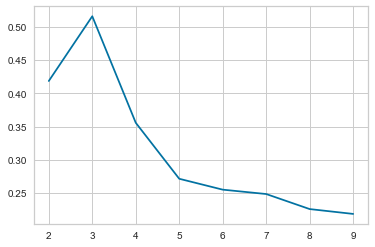

<IPython.core.display.Javascript object>

In [81]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

For the silhouette the right number of clusters are 3, the same as the distortion average level.

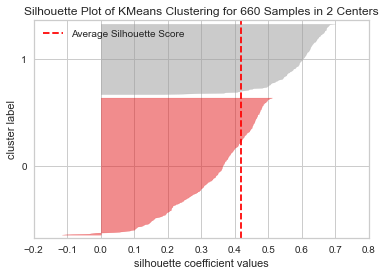

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [82]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled)
visualizer.show()

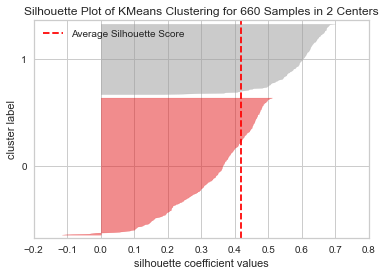

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [83]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled)
visualizer.show()

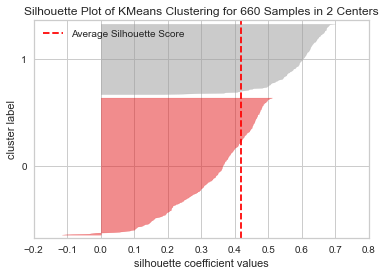

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [84]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled)
visualizer.show()

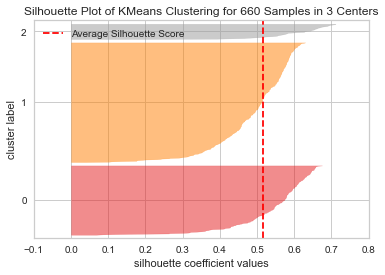

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [85]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled)
visualizer.show()

In [86]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [87]:
# adding kmeans cluster labels to the original dataframe
df1["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [88]:
cluster_profile = df1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [89]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,,
0,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


<IPython.core.display.Javascript object>

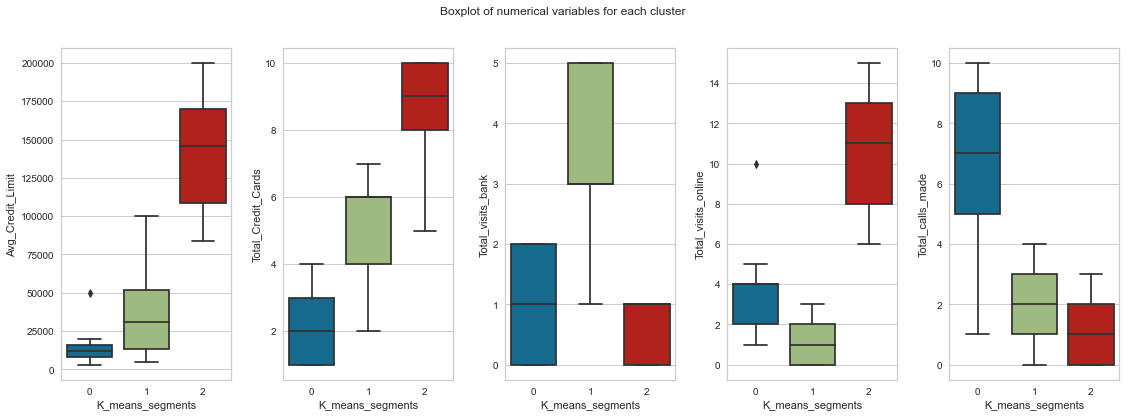

<IPython.core.display.Javascript object>

In [90]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df1[num_cols[counter]], x=df1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

The kmeans clustering algorithm made 3 customer groups. One represented by the high number of calls, the second one on the visits of bank, and the third group is represented as a high average of credit card and online visits.

Applying Hierarchical Clustering
Apply Hierarchical clustering with different linkage methods - Plot dendrograms for each linkage method - Check cophenetic correlation for each linkage method - Figure out appropriate number of clusters - Cluster Profiling

In [91]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801746.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

<IPython.core.display.Javascript object>

The best type of herarchical metric that has high cophenetic correlation is the Euclidian. 

In [92]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

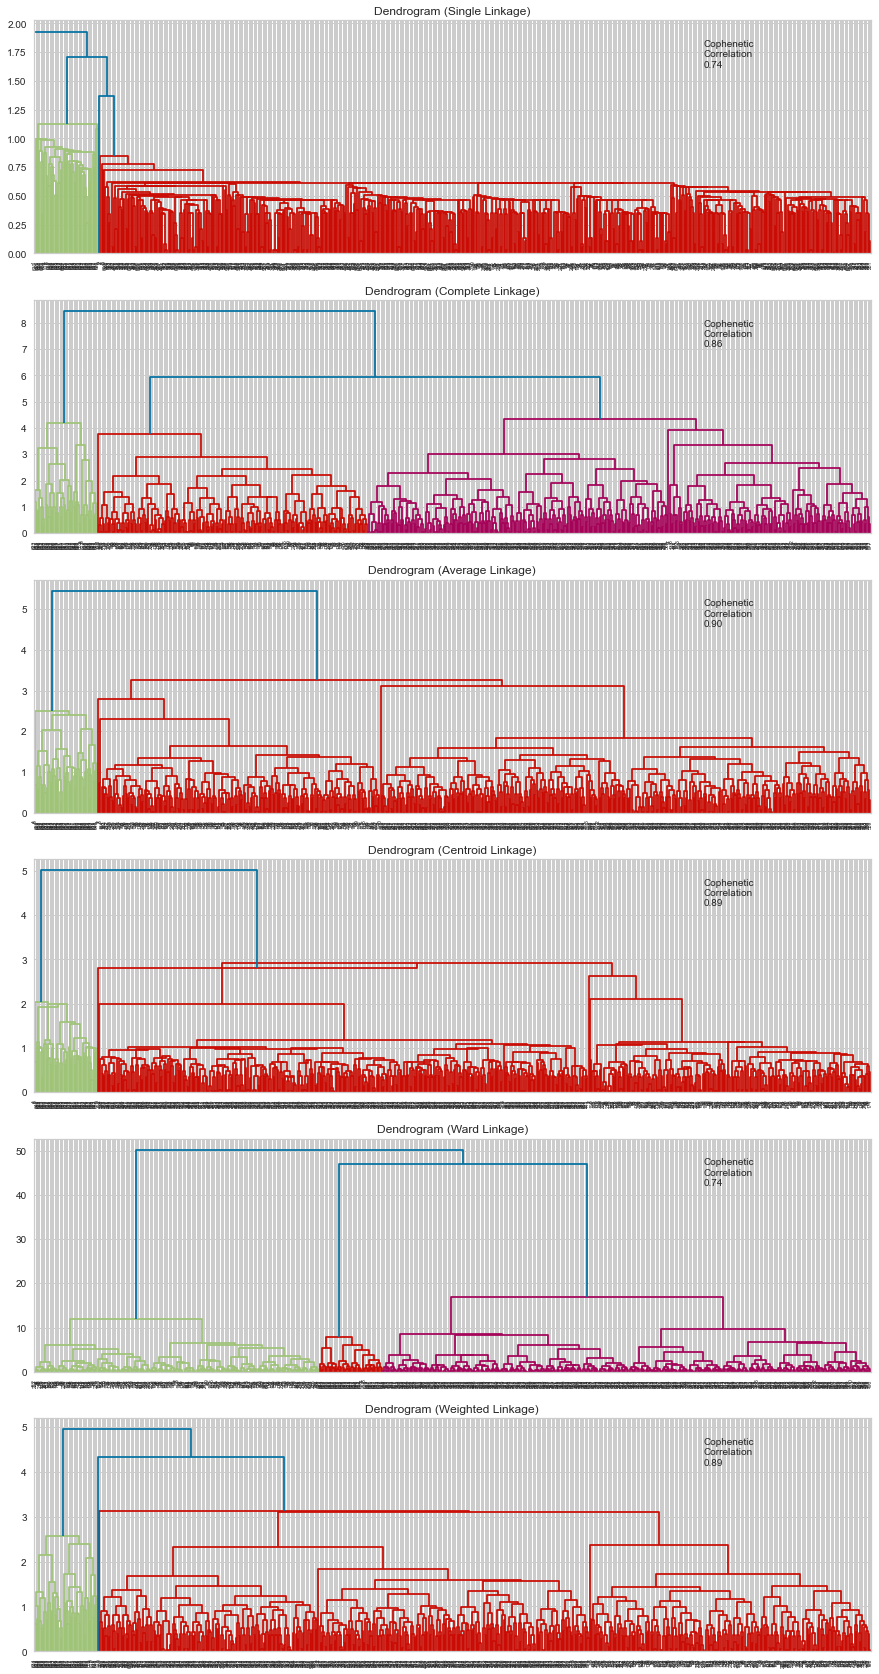

<IPython.core.display.Javascript object>

In [93]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

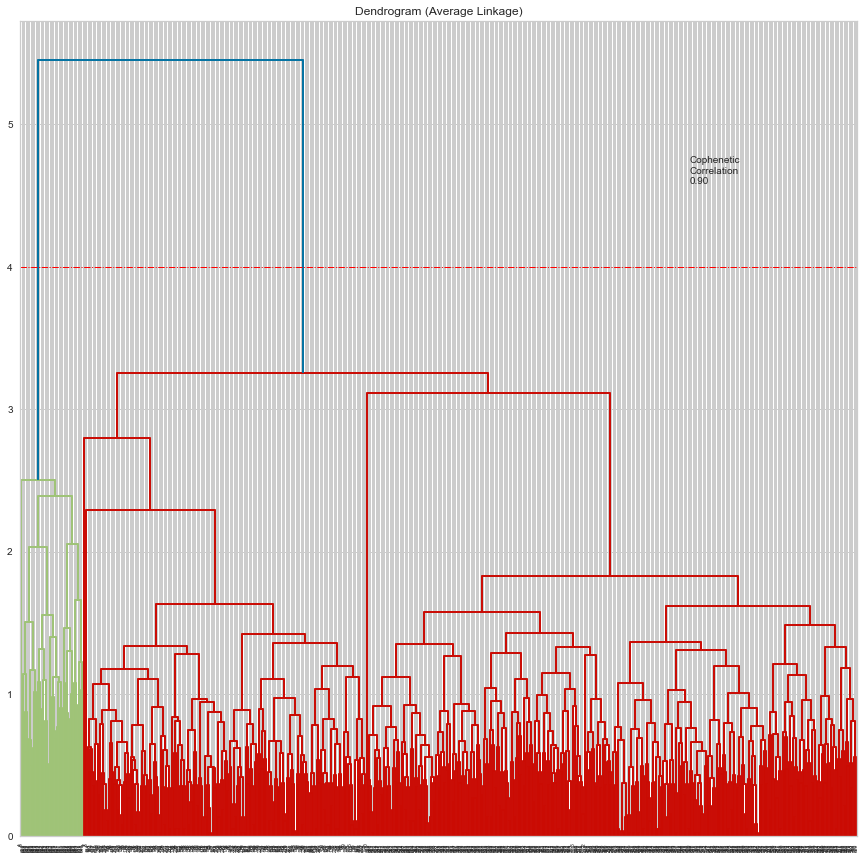

<IPython.core.display.Javascript object>

In [94]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=4)
plt.axhline(y=4, c="red", lw=1, linestyle="dashdot")

Profiling

In [95]:
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled)

AgglomerativeClustering(linkage='average')

<IPython.core.display.Javascript object>

In [96]:
df1["HCluset"] =HCmodel.labels_

<IPython.core.display.Javascript object>

In [97]:
cluster_profile = df1.groupby("HCluset").mean()


<IPython.core.display.Javascript object>

In [98]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
HCluset,,,,,,,
0,55012.975410,25847.540984,4.375410,2.550820,1.926230,3.788525,0.632787
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000


<IPython.core.display.Javascript object>

Actionable Insights & Recommendations
Conclude with the key takeaways for the business - What would be your recommendations to the business?

The bank should go for 3 clusters using the Kmeans, for targeting marketing campaigns